In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("esports2021.csv", low_memory= False)

In [129]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0


# Cleaning

In [130]:
df[df['datacompleteness'] != 'complete'].shape, df[df['datacompleteness'] == 'complete'].shape

((59328, 131), (88956, 131))

In [131]:
dfiltered = df[df['datacompleteness'] == 'complete'] # removing partial completeness
dfiltered = dfiltered[dfiltered['position'] == 'team'] # keeping only team statistics, as that is what we will be covering
dfiltered = dfiltered[dfiltered['earnedgold']>0] # removing games where we have negative earned gold
dfiltered.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,490.0,5018.0,4255.0,86.0,8.0,13.0,3.0,3.0,4.0,8.0
11,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,576.0,-5018.0,-4255.0,-86.0,3.0,4.0,8.0,8.0,13.0,3.0
22,ESPORTSTMNT03/1632500,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 08:53:45,2.0,10.25,...,566.0,573.0,-1879.0,-49.0,3.0,9.0,2.0,2.0,5.0,3.0
23,ESPORTSTMNT03/1632500,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 08:53:45,2.0,10.25,...,517.0,-573.0,1879.0,49.0,2.0,5.0,3.0,3.0,9.0,2.0
34,ESPORTSTMNT03/1632502,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 09:50:49,3.0,10.25,...,514.0,-579.0,-1643.0,-40.0,3.0,3.0,4.0,4.0,8.0,3.0


In [132]:
dfiltered.shape

(14552, 131)

In [175]:
# converting categorical columns to boolean
columns_to_convert = ['firstblood',
                      'firstdragon','firstbaron','firstherald','firsttower',
                      'firstmidtower','firsttothreetowers']
dfiltered[columns_to_convert] = df[columns_to_convert].astype(bool)
df['side'] = df['side']=='Blue'
df['team_kpm'] = df['team kpm']
df = dfiltered

# EDA

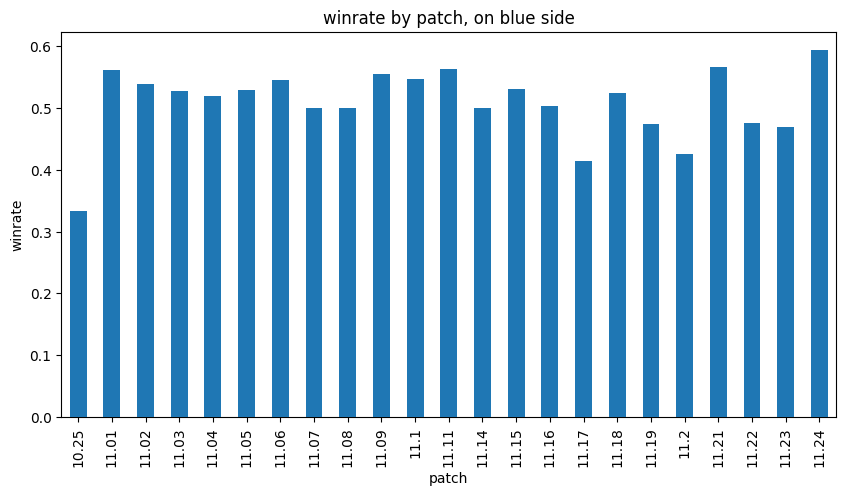

In [501]:
win_rate_by_team_league_year = df[df['side']==True].groupby('patch')['result'].mean()
win_rate_by_team_league_year.plot(kind='bar', figsize=(10, 5), zorder = 3)
plt.title('winrate by patch, on blue side')
plt.ylabel('winrate')
plt.savefig('math189images/patchside.png',bbox_inches='tight')
plt.show()

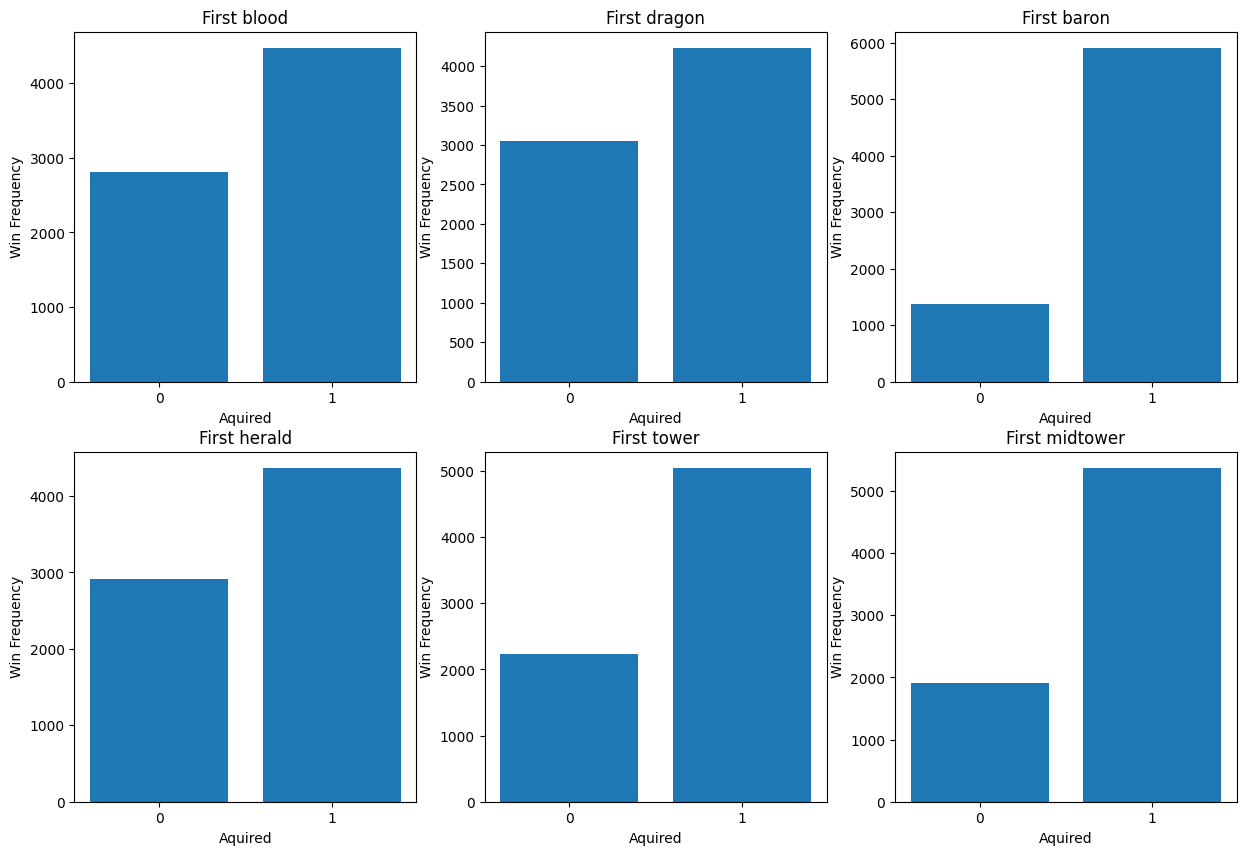

In [490]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

columns = ['firstblood','firstdragon','firstbaron','firstherald','firsttower','firstmidtower','firsttothreetowers']
axes = axes.flatten()

for ax, col in zip(axes, columns):
    counts = dfiltered[dfiltered['result'] == 1][col].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title('First ' + col[5:])
    ax.set_xlabel('Aquired')
    ax.set_ylabel('Win Frequency')
    ax.set_xticks([0, 1])

plt.savefig('math189images/binaryplots.png')
plt.show()

In [136]:
df['side']

10        Blue
11         Red
22        Blue
23         Red
34        Blue
          ... 
148235     Red
148258    Blue
148259     Red
148282    Blue
148283     Red
Name: side, Length: 14552, dtype: object

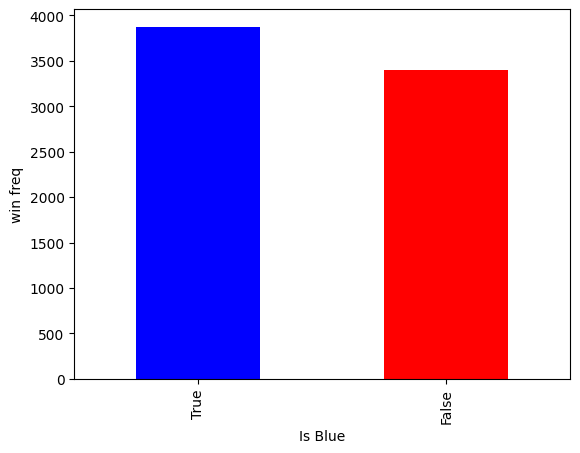

In [500]:
dfwins = df[df['result'] == True]

wincounts = dfwins['side'].value_counts()

wincounts.plot(kind='bar', color=['b', 'r'])
plt.xlabel('Is Blue')
plt.ylabel('win freq')
plt.savefig('math189images/sidediff.png',bbox_inches='tight')
plt.show()

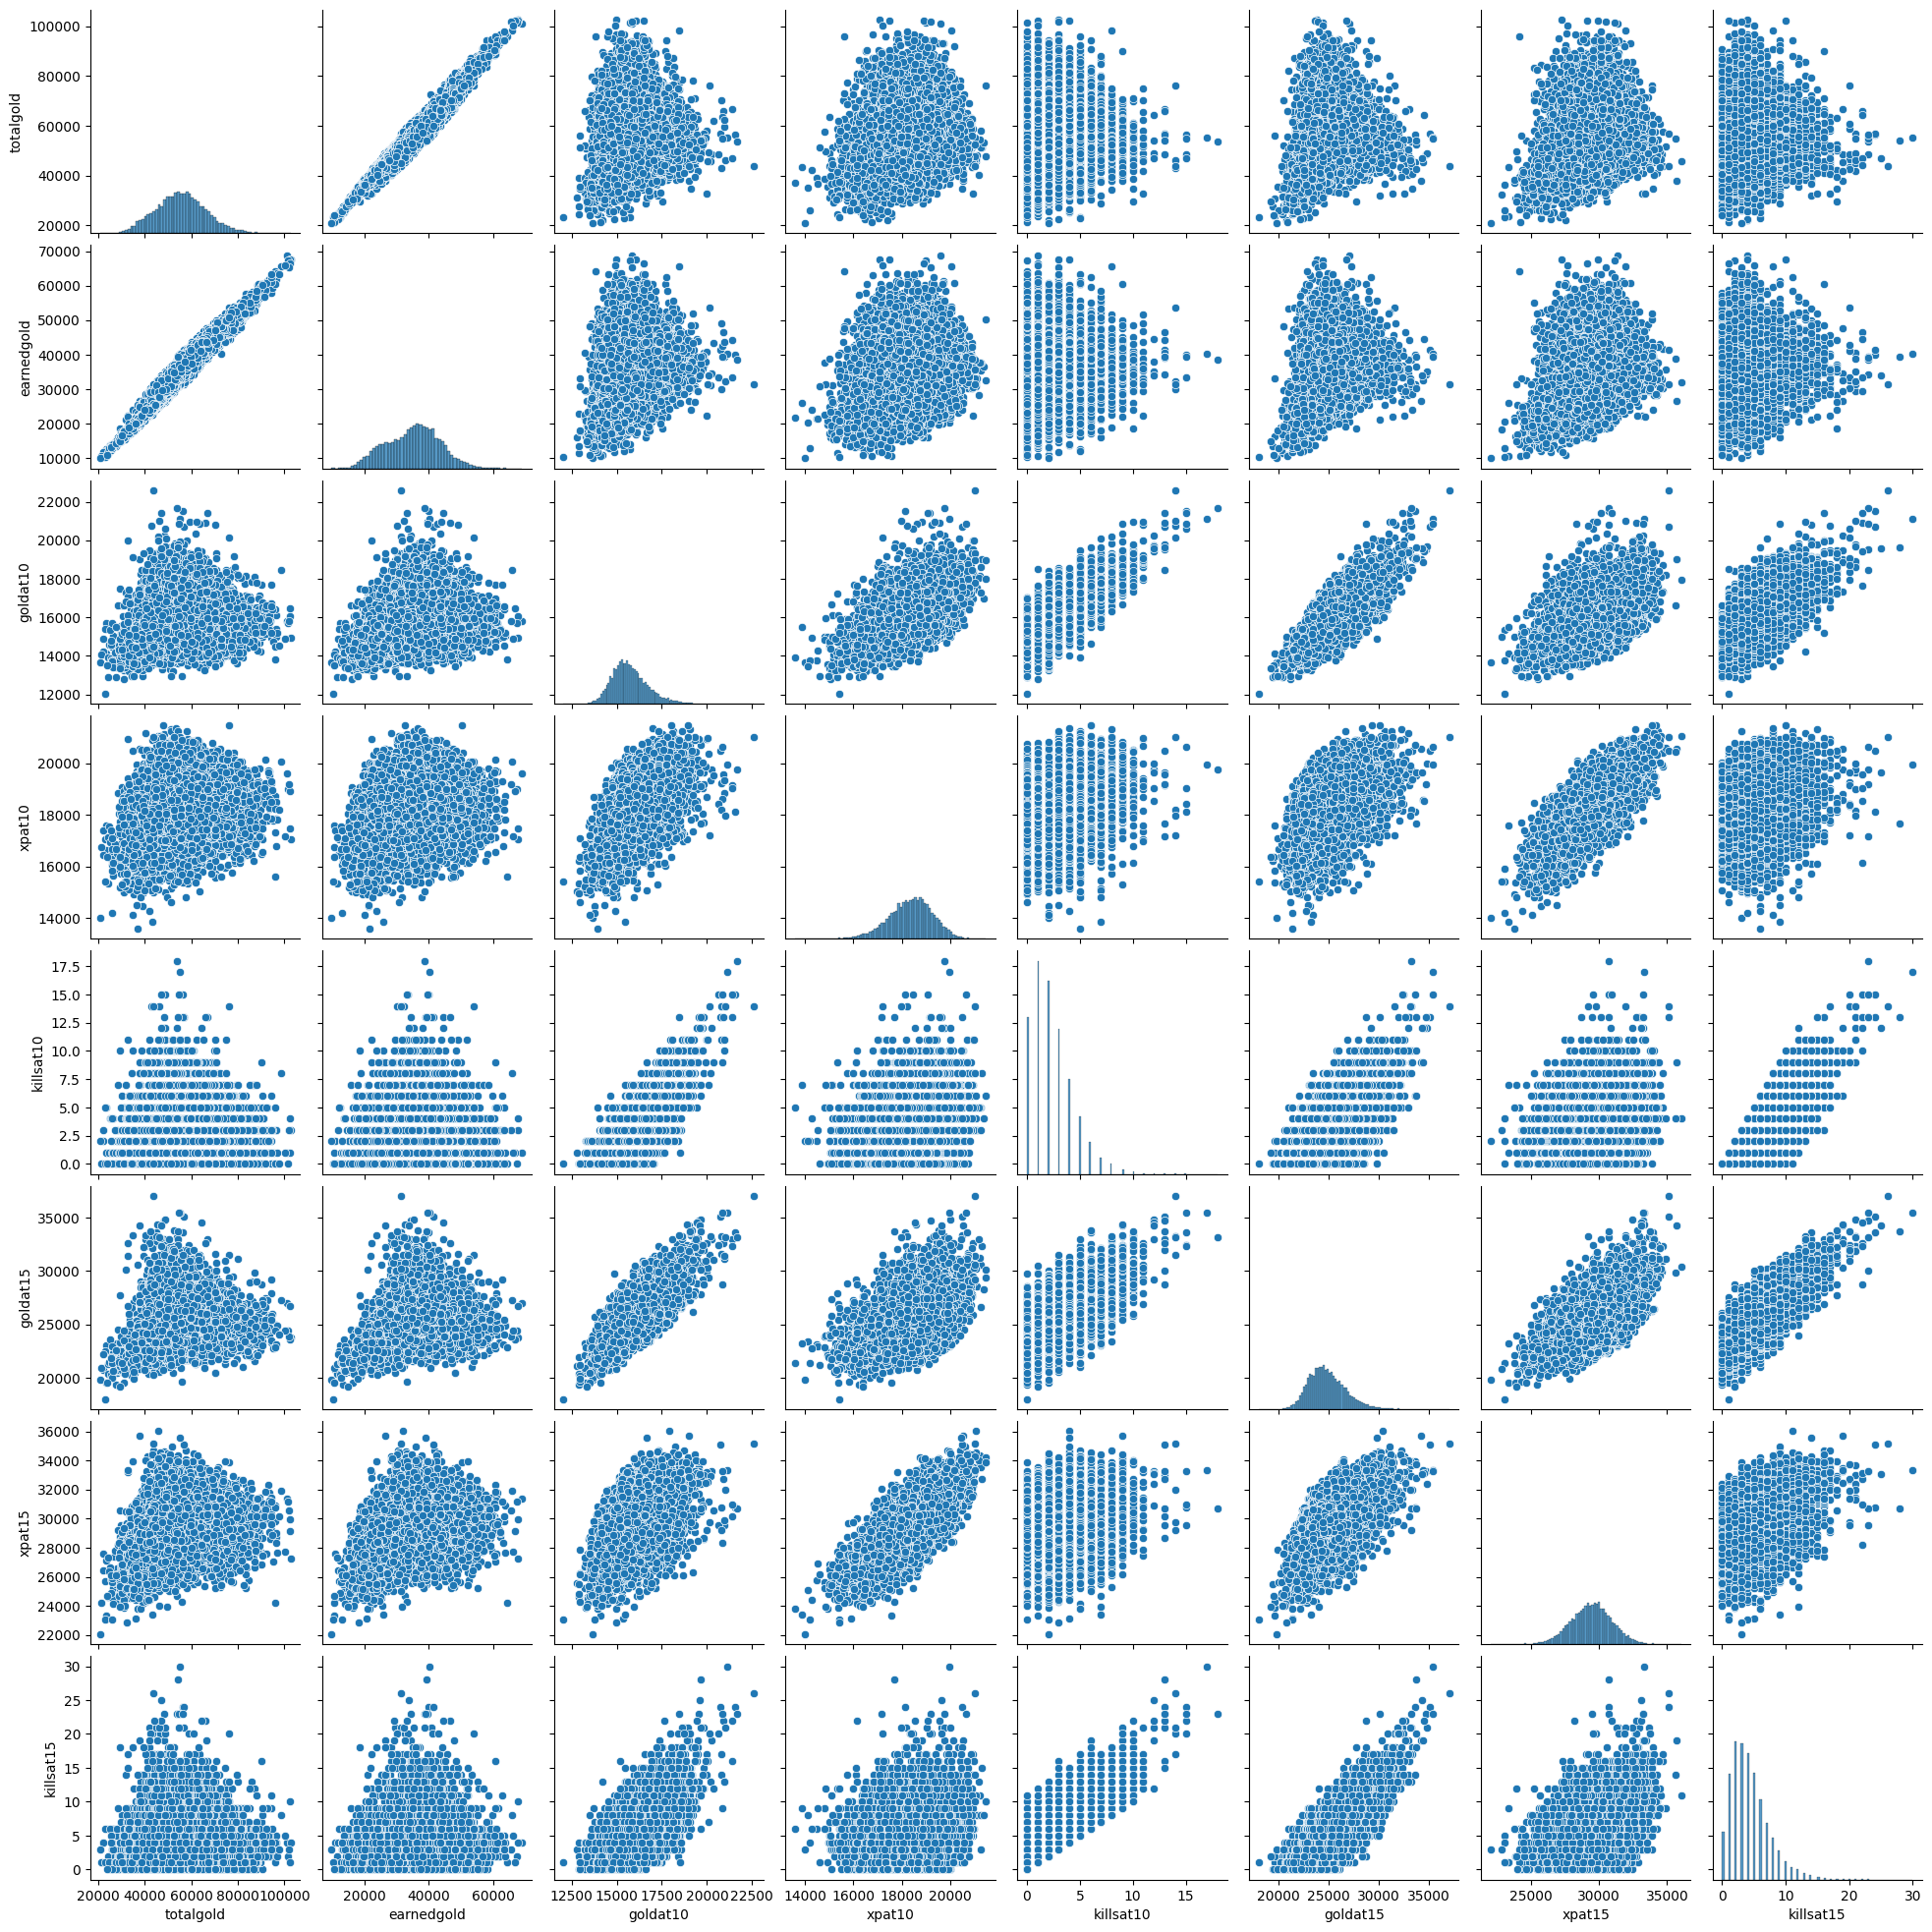

In [486]:
covariates = ['totalgold',
'earnedgold',
'goldat10',
'xpat10',
'killsat10',
'goldat15',
'xpat15',
'killsat15']

sns.pairplot(df[covariates], kind='scatter',)
plt.savefig('math189images/7x7pair.png')
plt.show()

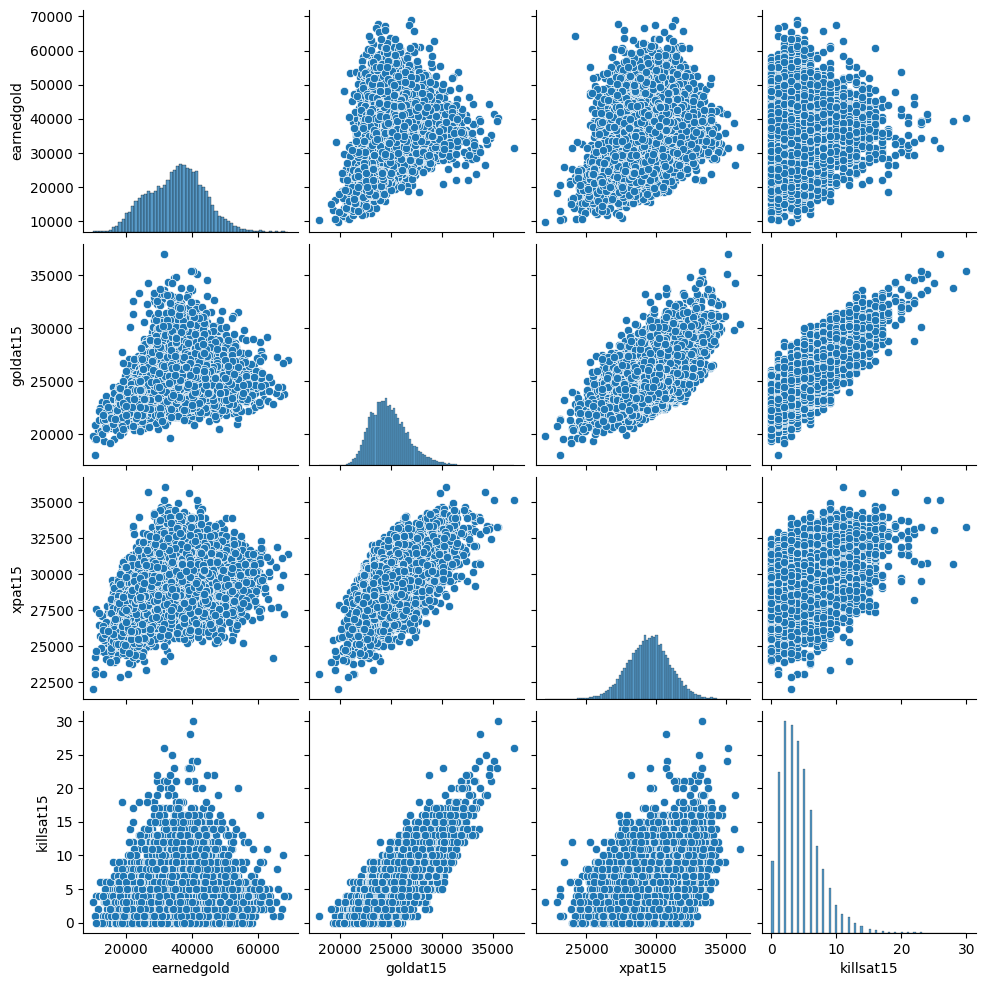

In [499]:
covariates = [
'earnedgold',
'goldat15',
'xpat15',
'killsat15']

sns.pairplot(df[covariates], kind='scatter',)
plt.savefig('math189images/4x4pair')
plt.show()

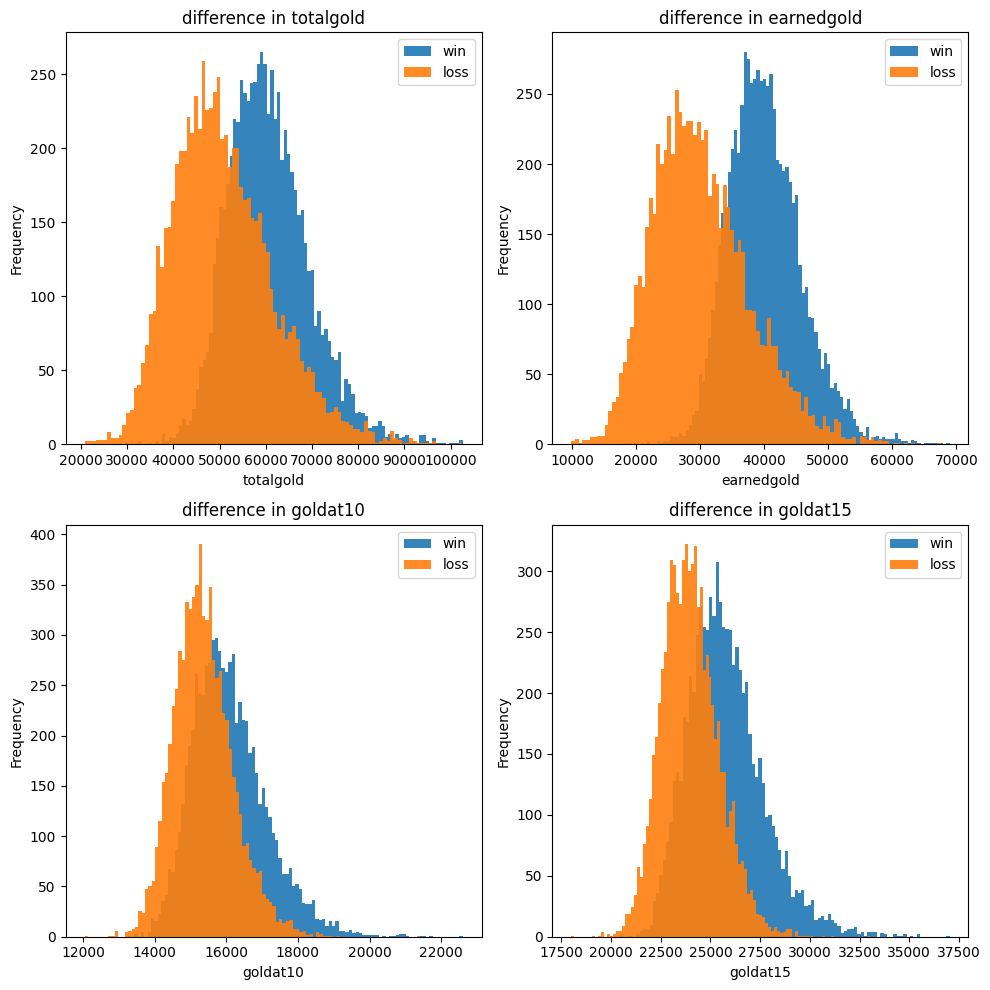

In [484]:
covariates = ['totalgold', 'earnedgold', 'goldat10', 'goldat15']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.flatten()

for ax, covariate in zip(axes, covariates):
    
    ax.hist(df[df['result']==True][covariate], bins = 100, label = 'win', alpha = .9)
    ax.hist(df[df['result']==False][covariate], bins = 100, label = 'loss', alpha = .9)
    ax.set_title(f'difference in {covariate}')    
    ax.set_xlabel(f'{covariate}')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('math189images/golddiffs.png')
plt.show()

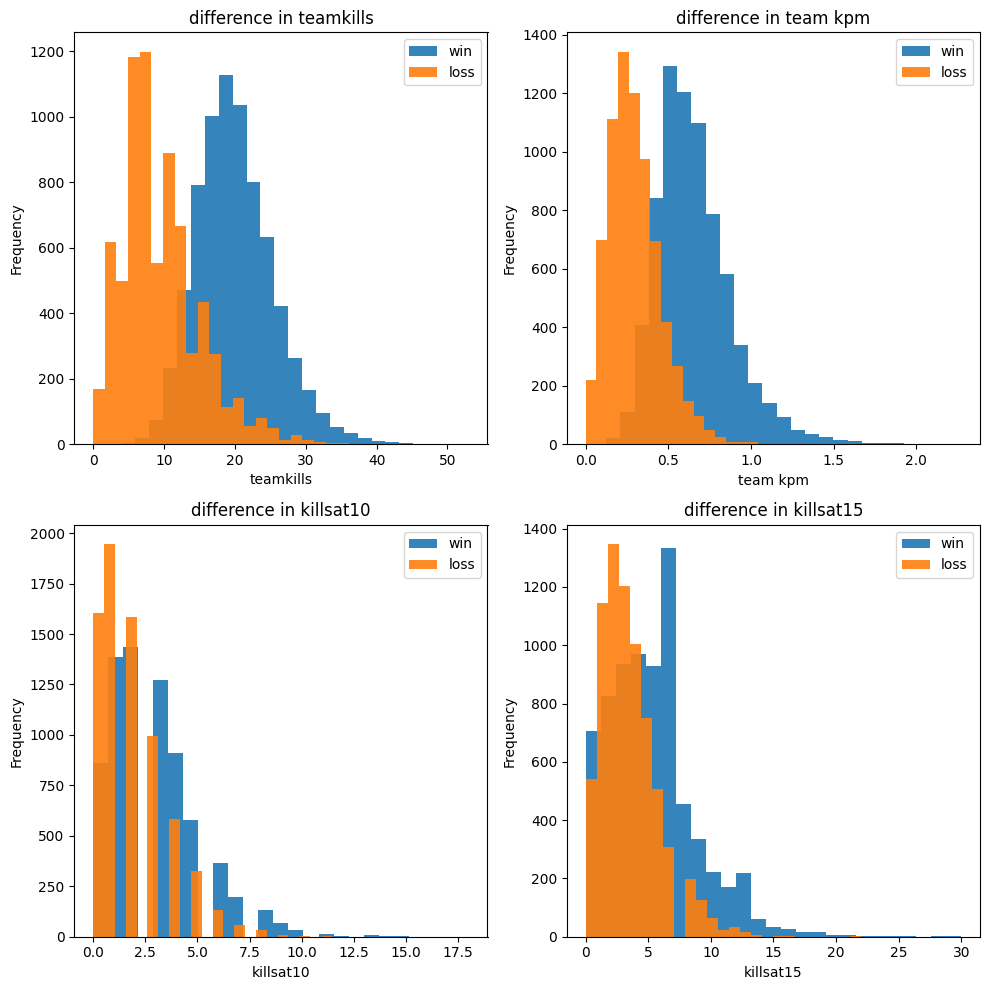

In [483]:
covariates = ['teamkills', 'team kpm', 'killsat10', 'killsat15']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes = axes.flatten()

for ax, covariate in zip(axes, covariates):
    
    ax.hist(df[df['result']==True][covariate], bins = 25, label = 'win', alpha = .9)
    ax.hist(df[df['result']==False][covariate], bins = 25, label = 'loss', alpha = .9)
    ax.set_title(f'difference in {covariate}')    
    ax.set_xlabel(f'{covariate}')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('math189images/killdiffs.png')
plt.show()

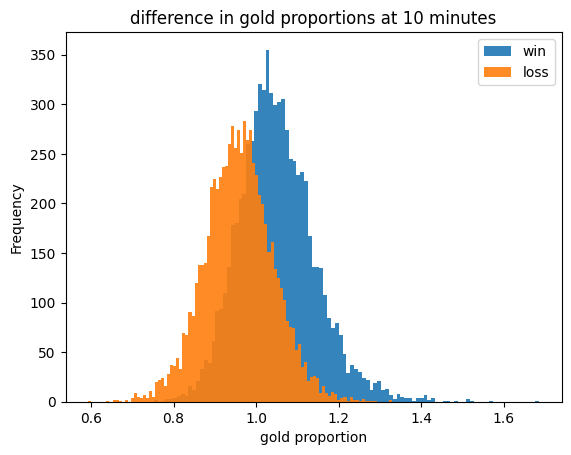

In [502]:
plt.hist(df[df['result']==True]['goldat10']/df[df['result']==True]['opp_goldat10'], bins = 100, label = 'win', alpha = .9)
plt.hist(df[df['result']==False]['goldat10']/df[df['result']==False]['opp_goldat10'], bins = 100, label = 'loss', alpha = .9)
plt.title('difference in gold proportions at 10 minutes')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('gold proportion')
plt.savefig('math189images/gpdiff10.png', bbox_inches='tight')
plt.show()

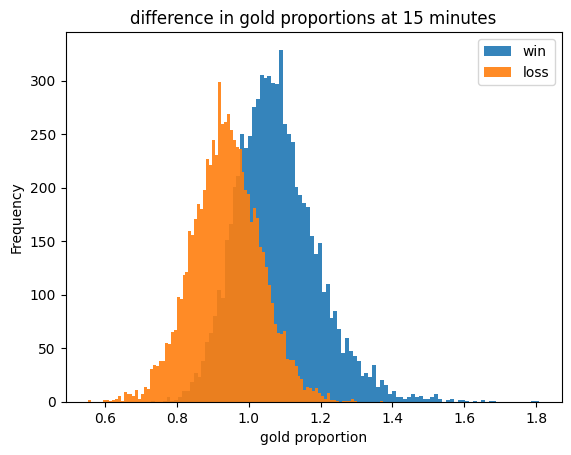

In [503]:
plt.hist(df[df['result']==True]['goldat15']/df[df['result']==True]['opp_goldat15'], bins = 100, label = 'win', alpha = .9)
plt.hist(df[df['result']==False]['goldat15']/df[df['result']==False]['opp_goldat15'], bins = 100, label = 'loss', alpha = .9)
plt.title('difference in gold proportions at 15 minutes')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('gold proportion')
plt.savefig('math189images/gp15diff.png',bbox_inches='tight')
plt.show()

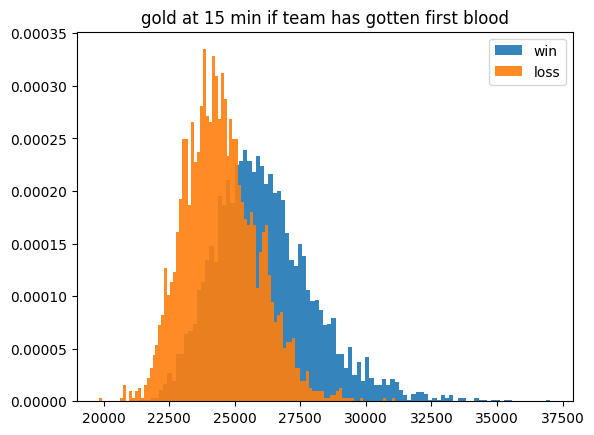

In [480]:
plt.hist(df[(df['result']==True) & (df['firstblood']==True)]['goldat15'], bins = 100, label = 'win', alpha = .9, density = True)
plt.hist(df[(df['result']==False) & (df['firstblood']==True)]['goldat15'], bins = 100, label = 'loss', alpha = .9, density = True)
plt.title('gold at 15 min if team has gotten first blood')
plt.legend()
plt.savefig('math189images/g15iffb.png')
plt.show()

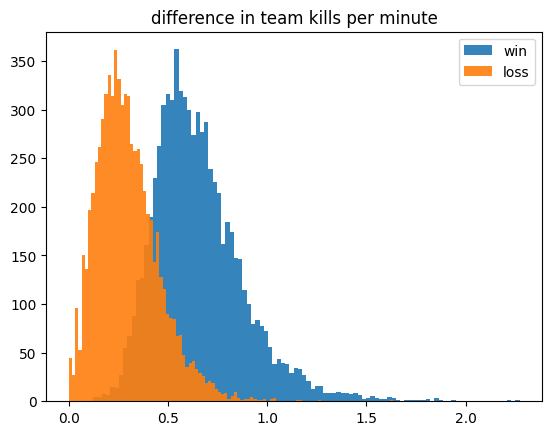

In [139]:
plt.hist(df[df['result']==True]['team kpm'], bins = 100, label = 'win', alpha = .9)
plt.hist(df[df['result']==False]['team kpm'], bins = 100, label = 'loss', alpha = .9)
plt.title('difference in team kills per minute')
plt.legend()
plt.show()

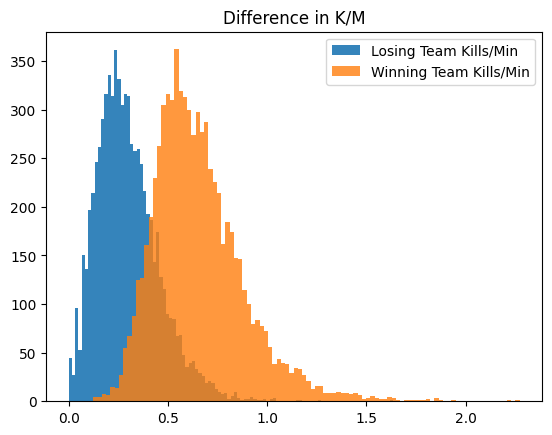

In [479]:
df_team_lose = df[df['result'] == False]
df_team_win = df[df['result'] == True]

ufig5_1 = plt.hist(df_team_lose['team kpm'], bins = 100, label = 'Losing Team Kills/Min', alpha = .9)
ufig5_2 = plt.hist(df_team_win['team kpm'], bins = 100, label = 'Winning Team Kills/Min', alpha = .8)
plt.title('Difference in K/M')
plt.legend()
plt.savefig('math189images/kpmdiff.png')
plt.show()

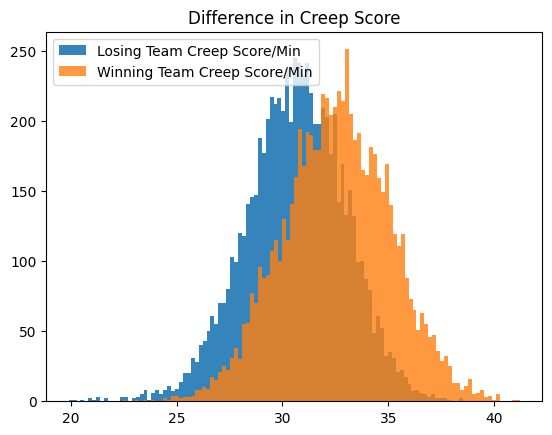

In [478]:
ufig6_1 = plt.hist(df_team_lose['cspm'], bins = 100, label = 'Losing Team Creep Score/Min', alpha = .9)
ufig6_2 = plt.hist(df_team_win['cspm'], bins = 100, label = 'Winning Team Creep Score/Min', alpha = .8)
plt.title('Difference in Creep Score')
plt.legend()
plt.savefig('math189images/csdiff.png')
plt.show()

# Data Analysis & Modeling

In [265]:
from statsmodels.formula.api import logit
from scipy.stats import ks_2samp

In [408]:
def forwardselect(covariates):
    excluded = covariates
    included = []
    formula = "result ~ 1"
    model = logit(formula, df).fit(disp=False)
    cbic = model.bic
    nbic = cbic

    while(True):
        if len(excluded) == 0:
            break
        bics = []
        for i in excluded:
            formula = "result ~ " + " + ".join(included + [i])
            model = logit(formula, df).fit(disp=False)
#             print(model.bic,'\t',formula)
            bics.append(model.bic)
        nbic = np.min(bics)
        if nbic >= cbic:
            break

        print(f'added {excluded[np.argmin(bics)]}\t\t with bic score : {np.min(bics)}')
        included += [excluded[np.argmin(bics)]]
        excluded = list(set(excluded) - {excluded[np.argmin(bics)]})
        cbic = nbic

    print()
    return ("result ~ " + " + ".join(included))

In [336]:
covariates =   ['teamkills',
                'teamdeaths',
                'firstblood',
                'team_kpm',
                'firstdragon',
                'firstherald',
                'firstbaron',
                'firsttower',
                'firstmidtower',
                'firsttothreetowers',
                'totalgold',
                'earnedgold',
                'goldat10',
                'xpat10',
                'killsat10',
                'goldat15',
                'xpat15',
                'killsat15',]
#               'barons',
#               'elders',
#               'dragons',
#               'dpm',
#               'inhibitors',
#               'towers']

In [357]:
for covariate in covariates:
    ks_statistic, p_value = ks_2samp(df[df['result']==True][covariate], df[df['result']==False][covariate])
    print(f'{covariate}')
    print("\tKS test statistic:", ks_statistic)
    print("\tP-value:", p_value)

teamkills
	KS test statistic: 0.6833557501462736
	P-value: 0.0
teamdeaths
	KS test statistic: 0.6816796695515268
	P-value: 0.0
firstblood
	KS test statistic: 0.22842215765248225
	P-value: 7.667277109399925e-167
team_kpm
	KS test statistic: 0.6926936867889084
	P-value: 0.0
firstdragon
	KS test statistic: 0.16148983262711164
	P-value: 2.9634973505698047e-83
firstherald
	KS test statistic: 0.1994226879680696
	P-value: 5.204366775036258e-127
firstbaron
	KS test statistic: 0.6636831480062164
	P-value: 0.0
firsttower
	KS test statistic: 0.3859263215506938
	P-value: 0.0
firstmidtower
	KS test statistic: 0.47457402624755207
	P-value: 0.0
firsttothreetowers
	KS test statistic: 0.5636337998504917
	P-value: 0.0
totalgold
	KS test statistic: 0.43956607623605326
	P-value: 0.0
earnedgold
	KS test statistic: 0.5951402125134645
	P-value: 0.0
goldat10
	KS test statistic: 0.3034642594211296
	P-value: 3.5046241443332233e-296
xpat10
	KS test statistic: 0.21603281439851682
	P-value: 4.368786395338068e-149


In [505]:
model0f

NameError: name 'model0f' is not defined

In [378]:
#10 minute model
covariates10 = ['firstblood',
                'firstdragon',
                'firstherald',
                'goldat10',
                'xpat10',
                'killsat10',]

model10f = forwardselect(covariates10)
model10f

added goldat10		 with bic score : 18088.44642156425
added firstdragon		 with bic score : 17834.451224891844
added firstherald		 with bic score : 17554.250266328476
added xpat10		 with bic score : 17441.475985847843
added firstblood		 with bic score : 17319.615882502792
added killsat10		 with bic score : 17308.814300068017



'result ~ goldat10 + firstdragon + firstherald + xpat10 + firstblood + killsat10'

In [379]:
#15 minute model
covariates15 = ['firstblood',
                'firstdragon',
                'firstherald',
                'firsttower',
                'goldat10',
                'xpat10',
                'killsat10',
                'goldat15',
                'xpat15',
                'killsat15',]


model15f = forwardselect(covariates15)
model15f

added goldat15		 with bic score : 16455.989271855935
added firsttower		 with bic score : 16071.572093817525
added xpat15		 with bic score : 15814.390492557599
added firstdragon		 with bic score : 15617.838885520345
added firstblood		 with bic score : 15537.589466499652
added xpat10		 with bic score : 15527.775761765235
added killsat10		 with bic score : 15525.827267389119
added killsat15		 with bic score : 15525.778994445574
result ~ goldat15 + firsttower + xpat15 + firstdragon + firstblood + xpat10 + killsat10 + killsat15 + firstherald
15526.952746222374 15525.778994445574



'result ~ goldat15 + firsttower + xpat15 + firstdragon + firstblood + xpat10 + killsat10 + killsat15'

In [406]:
#mid game model
covariatesmid =   ['firstblood',
                'firstdragon',
                'firstherald',
                'firstbaron',
                'firsttower',
                'firstmidtower',
                'goldat10',
                'xpat10',
                'killsat10',
                'goldat15',
                'xpat15',
                'killsat15',]

modelmidf = forwardselect(covariatesmid)
modelmidf 

added firstbaron		 with bic score : 13182.187545036913
added goldat15		 with bic score : 11333.068927206286
added firstmidtower		 with bic score : 10816.900476369678
added firstdragon		 with bic score : 10713.236110241447
added firsttower		 with bic score : 10653.196021145195
added xpat15		 with bic score : 10590.304050789788
added firstblood		 with bic score : 10578.461654817505
added xpat10		 with bic score : 10576.464380646556
result ~ firstbaron + goldat15 + firstmidtower + firstdragon + firsttower + xpat15 + firstblood + xpat10 + killsat15



'result ~ firstbaron + goldat15 + firstmidtower + firstdragon + firsttower + xpat15 + firstblood + xpat10'

In [410]:
#end game model

covariatesend =   [
                'firstblood',
                'firstdragon',
                'firstherald',
                'firstbaron',
                'firsttower',
                'firstmidtower',
                'firsttothreetowers',
                'goldat10',
                'xpat10',
                'killsat10',
                'goldat15',
                'xpat15',
                'killsat15',
                'barons',
                'elders',]
#               'dragons',
#               'dpm',
#               'inhibitors',
#               'towers']

modelendf = forwardselect(covariatesend)
modelendf 

added barons		 with bic score : 12733.44001808925
added firsttothreetowers		 with bic score : 10428.43265108648
added goldat15		 with bic score : 9754.043308190194
added firstbaron		 with bic score : 9538.630140600413
added elders		 with bic score : 9431.134454310468
added firstdragon		 with bic score : 9334.414220560937
added firstmidtower		 with bic score : 9276.005384069444
added xpat15		 with bic score : 9239.501981295494
added killsat15		 with bic score : 9238.415490583284
added firsttower		 with bic score : 9231.126960528274
added firstblood		 with bic score : 9230.67195634922



'result ~ barons + firsttothreetowers + goldat15 + firstbaron + elders + firstdragon + firstmidtower + xpat15 + killsat15 + firsttower + firstblood'

In [417]:
# finished game model

covariatesfin =   ['teamkills',
                'teamdeaths',
                'firstblood',
                'team_kpm',
                'firstdragon',
                'firstherald',
                'firstbaron',
                'firsttower',
                'firstmidtower',
                'firsttothreetowers',
                'totalgold',
                'earnedgold',
                'goldat10',
                'xpat10',
                'killsat10',
                'goldat15',
                'xpat15',
                'killsat15',
                'barons',
                'elders',
                'dragons',
                'dpm',
                'inhibitors',
                'towers']

modelfinf = forwardselect(covariatesfin)
modelfinf 

added towers		 with bic score : 3418.5870668631837
added teamdeaths		 with bic score : 2386.329592898925
added team_kpm		 with bic score : 1356.0548343411212
added killsat15		 with bic score : 1262.4717002437133
added firsttothreetowers		 with bic score : 1239.6404555666543
added firstbaron		 with bic score : 1225.7086719483327
added elders		 with bic score : 1222.2363196160754
added firstdragon		 with bic score : 1218.62008103011



'result ~ towers + teamdeaths + team_kpm + killsat15 + firsttothreetowers + firstbaron + elders + firstdragon'

In [454]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [520]:
modelfs = [modelstartf:='result ~ side', model10f, model15f, modelmidf, modelendf, modelfinf]
accs = []

for modelf in modelfs:
    model = logit(modelf,df[:10000]).fit(disp=False)
    preds = model.predict(df[10000:]) > 0.5
    accs+=[accuracy_score(preds,df[10000:]['result'])]
    print(accuracy_score(preds,df[10000:]['result']),f1_score(preds,df[10000:]['result']))

0.5221880492091389 0.5220830586684245
0.6568541300527241 0.6453224341507721
0.7146309314586995 0.7095908786049632
0.8460017574692443 0.8453562761967791
0.8642355008787346 0.8630319148936171
0.984402460456942 0.9844264093002852


In [507]:
model = logit(modelstart,df[:10000]).fit(disp=False).bic

In [508]:
model

13825.959511519462

In [448]:
np.array(accs)

array([0.52218805, 0.65685413, 0.71463093, 0.84600176, 0.8642355 ,
       0.98440246])

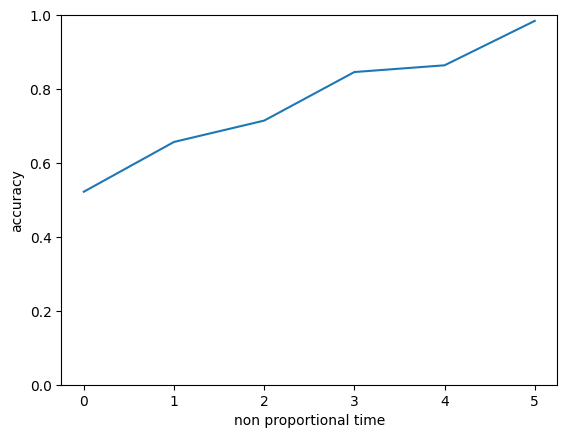

In [475]:
results = pd.DataFrame({'x':np.array(range(6)),'y':np.array(accs)})

plt.plot(np.array([0,1,2,3,4,5]), np.array(accs))
plt.ylim(0,1)
plt.xlabel('non proportional time')
plt.ylabel('accuracy')
plt.savefig('math189images/accvstime.png')
plt.show()

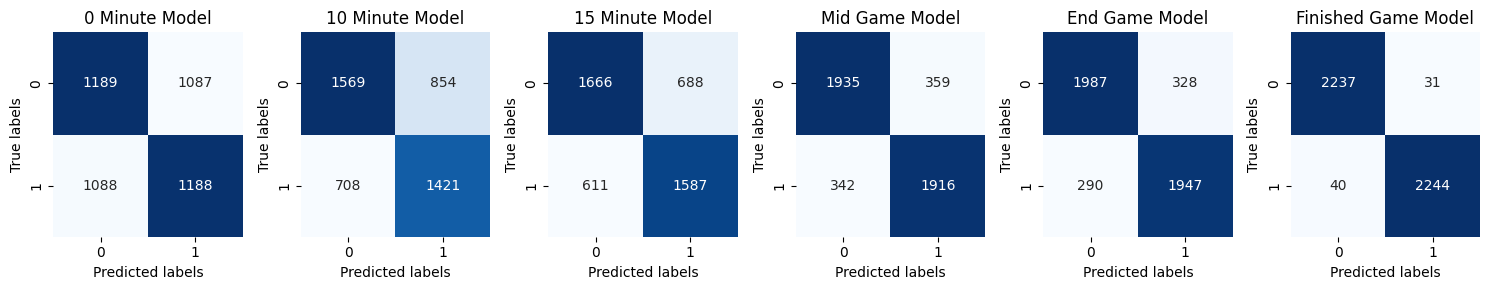

In [510]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
axes = axes.flatten()

titles=['0 Minute Model',
'10 Minute Model', 
'15 Minute Model',
'Mid Game Model',
'End Game Model',
'Finished Game Model',]

i = 0
for ax, modelf in zip(axes, modelfs):
    model = logit(modelf,df[:10000]).fit(disp=False)
    preds = model.predict(df[10000:]) > 0.5
    
    cm = confusion_matrix(preds,df[10000:]['result'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'{titles[i]}')
    i += 1 

plt.tight_layout()
plt.savefig('math189images/conf_matrix.png')
plt.show()

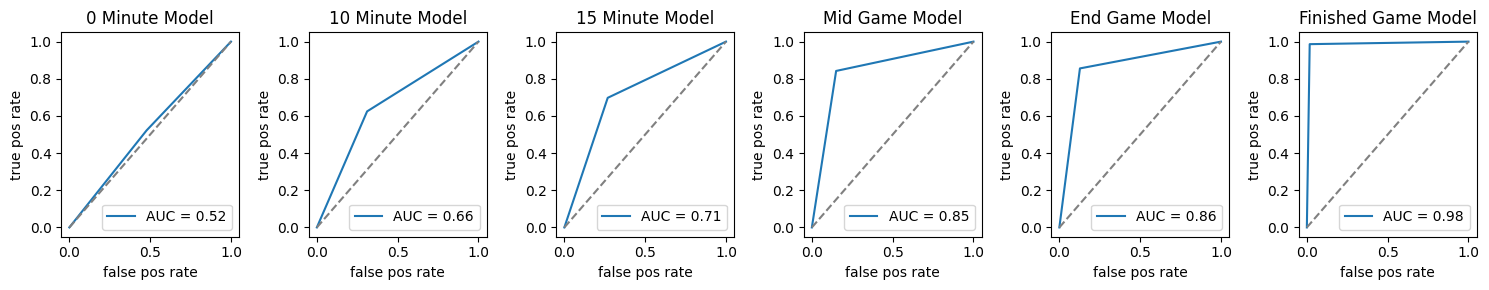

In [512]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
axes = axes.flatten()

i = 0
for ax, modelf in zip(axes, modelfs):
    
    model = logit(modelf,df[:10000]).fit(disp=False)
    preds = model.predict(df[10000:]) > 0.5
    
    fpr, tpr, thresholds = roc_curve(df[10000:]['result'], preds)

    auc_score = roc_auc_score(df[10000:]['result'], preds)

    ax.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='grey')
    ax.set_xlabel('false pos rate')
    ax.set_ylabel('true pos rate')
    ax.set_title(f'{titles[i]}')
    ax.legend(loc='lower right')
    i+=1


plt.tight_layout()
plt.savefig('math189images/roc_curves.png')
plt.show()

In [422]:
pd.DataFrame({'x':np.array(range(6)),'y':np.array(accs)})
interactions = [x+':'+y for x in covariates for y in covariates]
formula = 'result ~ ' + ' + '.join(covariates)

model1 = logit(formula,df[:10000]).fit()
preds = model1.predict(df[10000:]) > 0.5
accuracy_score(preds,df[10000:]['result'])

Optimization terminated successfully.
         Current function value: 0.057412
         Iterations 11


0.9738576449912126

In [519]:
for modelf in modelfs:
    model = logit(modelf,df[:10000]).fit(disp=False)
    print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                0.003997
Time:                        22:34:51   Log-Likelihood:                -6903.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                 9.810e-14
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1491      0.028     -5.256      0.000      -0.205      -0.093
side[T.True]     0.2982      0.040      7.433      0.000       0.220       0.377
                           Logit Regression 